In [4]:
import pandas as pd
import numpy as np
import math
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA                 # for dimensionality reduction using PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns            # visualization tool
import matplotlib.cm as cm       # for colour mapping to use for the pca plots
from scipy.signal import hilbert, chirp
from scipy import signal
from scipy.fftpack import fft

In [2]:
basepath = '/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/'
outpath = '/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/CLEANED2/'
folders = os.listdir(basepath)

In [3]:
def listdir(x):
    return os.listdir(basepath+x)
def readcsv(x,y):
    file = basepath+x+'/'+y
    /print y
    return pd.read_csv(file)

def get_files(x,y):
    file = basepath+x+'/'+y
    return file
def create_folder(folder):
    directory=outpath+folder+'/'
    if not os.path.exists(directory):
        os.makedirs(directory)


In [5]:
for folder in folders:
    if '' in folder:
        files =  listdir(folder)
        
        
        for file in files:
            if 'csv' in file:
                data = get_files(folder,file)
                create_folder(folder)

                clean(data,file,folder)
                #print(data.head)
            

/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/YELLOW-1570181722/emg-1570181722.csv
emg1
emg2
emg3
emg4
emg5
emg6
emg7
emg8
/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/YELLOW-1570181722/accelerometer-1570181722.csv
x
y
z
/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/YELLOW-1570181722/orientationEuler-1570181722.csv
roll
pitch
yaw
/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/YELLOW-1570181722/gyro-1570181722.csv
x
y
z
/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/YELLOW-1570181722/orientation-1570181722.csv
x
y
z
w
/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/YELLOW-1570181520/orientationEuler-1570181520.csv
roll
pitch
yaw
/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/YELLOW-1570181520/emg-1570181520.csv
emg1

In [5]:
def clean(filename,name,folder):
    main_signal=pd.read_csv(filename)
    print(filename)
    
    t= main_signal['timestamp']
    N=main_signal.shape[0]
    temp = np.array([])
    temp = np.hstack((temp, np.array(t)))
    cols = list(main_signal.columns)

    for column in cols[1:]: #miss the timestamp column
        print(column)
        signal_ =np.abs(main_signal[column])

        b, a = signal.butter(1,0.02, 'low', analog = False) 
        output = signal.filtfilt(b, a, signal_)

        analytic_signal = hilbert(output)
        amplitude_envelope = np.abs(analytic_signal)
        
        temp = np.vstack((temp, amplitude_envelope))

        fourier = np.fft.fft(output)

        s=0
        e=N
        

        plt.figure(figsize=(10,5))
        plt.plot(t[s:e], signal_[s:e], label='signal')
        plt.plot(t[s:e], output[s:e], label='signal')

        plt.plot(t[s:e], amplitude_envelope[s:e], label='envelope',color='black')
        plt.show()
        plt.plot(t[s:e], output[s:e], label='envelope',color='red')
        
        
        plt.plot(t[s:e], amplitude_envelope[s:e], label='envelope',color='black')
        plt.show()

        xf =np.fft.fftfreq(N)  

        #plt.plot((xf*200)[10:N//2], (fourier.real**2 + fourier.imag**2)[10:N//2])
        
    #result = pd.DataFrame(temp.transpose(),columns = cols)
    #result.to_csv(r'/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/CLEANED2/'+folder+'/'+name,index = False)


/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/YELLOW-1570181489/emg-1570181489.csv
emg1


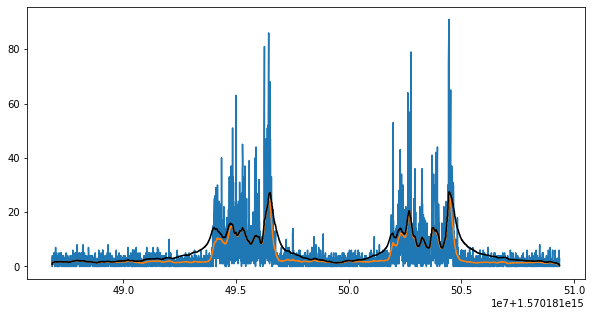

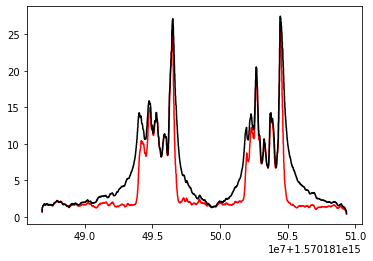

emg2


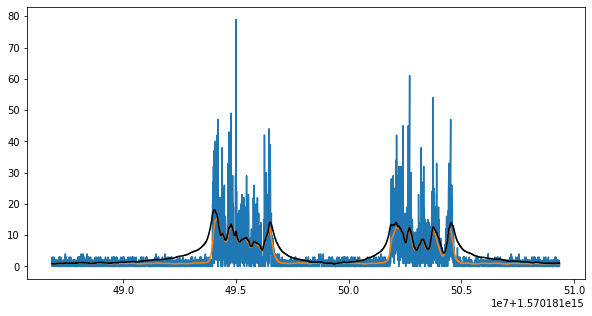

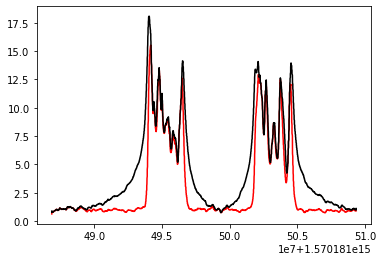

emg3


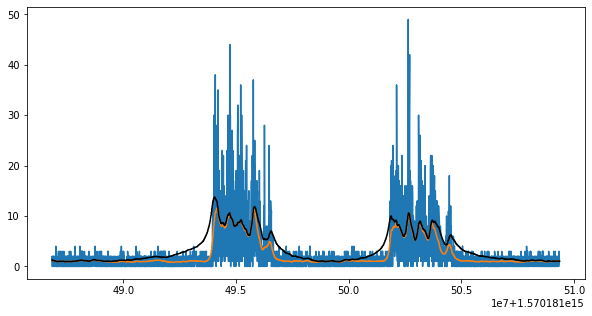

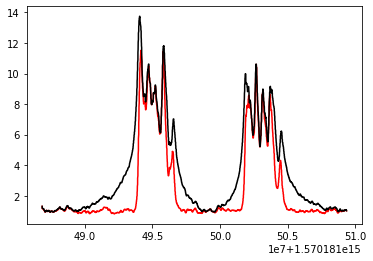

emg4


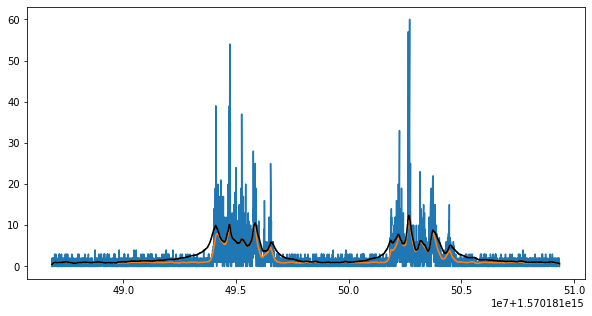

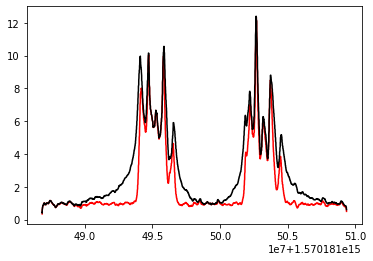

emg5


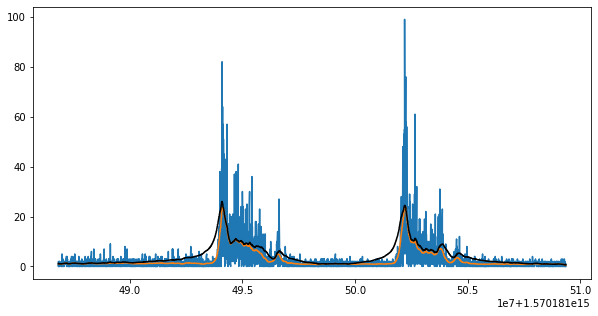

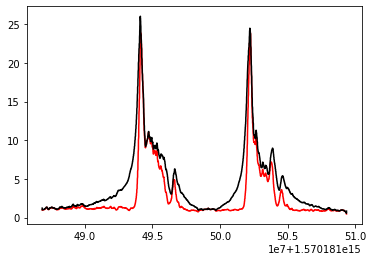

emg6


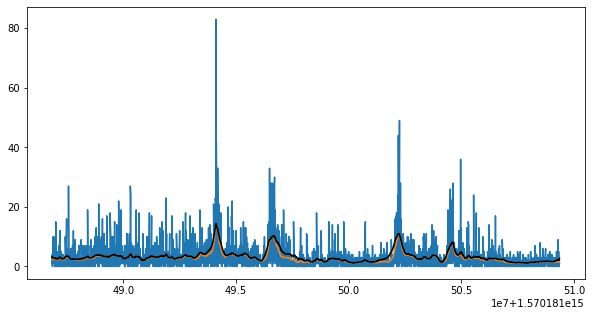

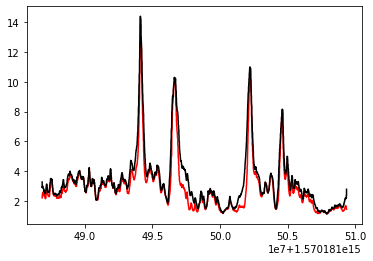

emg7


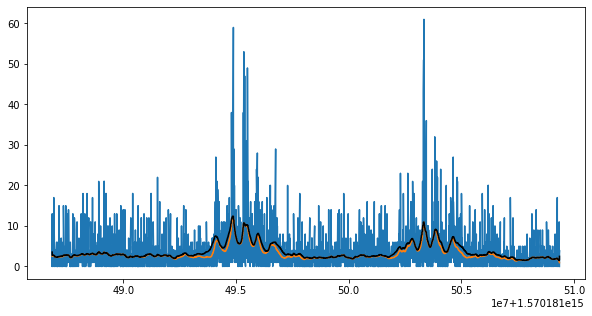

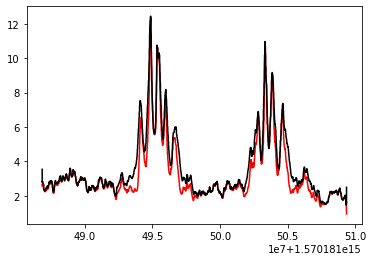

emg8


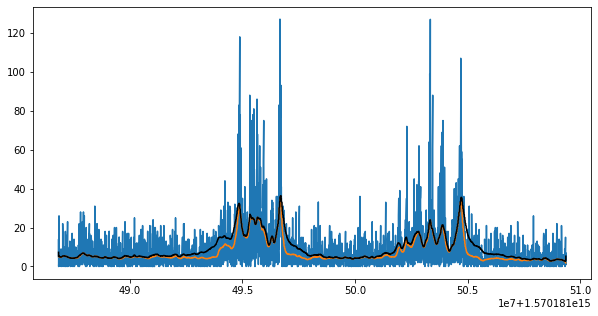

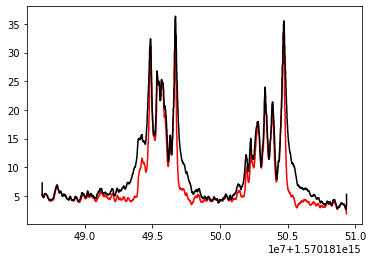

In [6]:
import pandas as pd
clean('/home/amaya/emp/Realtime-Sign-Language-Translation-to-Speech-DNN/Preprocess/DATASET-2/YELLOW-1570181489/emg-1570181489.csv','emg-1570181489.csv','YELLOW-1570181489');

/home/amaya/emp/DATASET/NO-1569406366/accelerometer-1569406366.csv
x


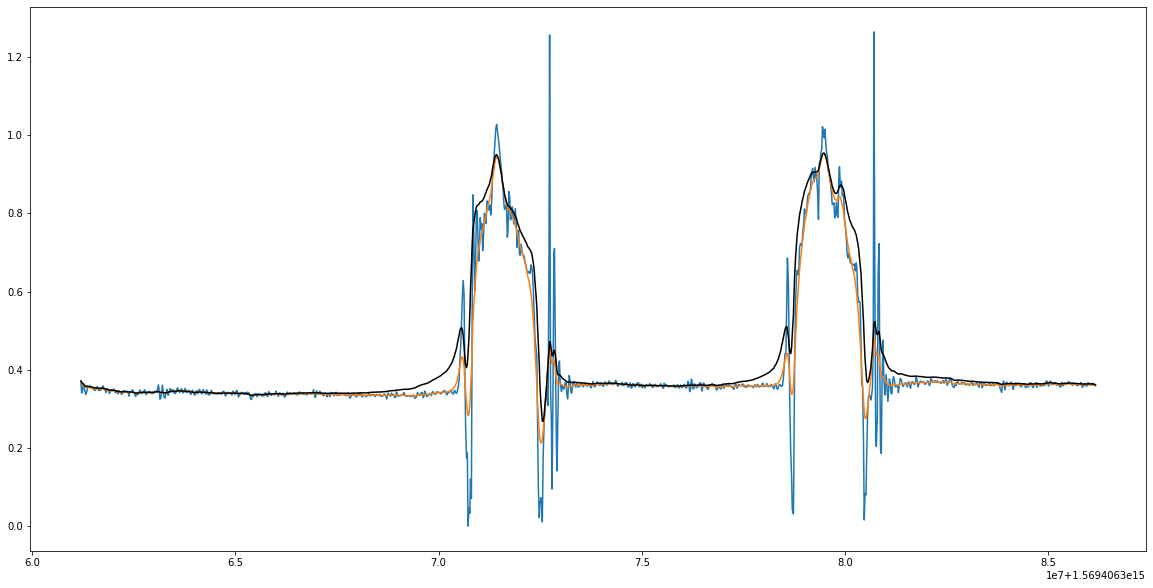

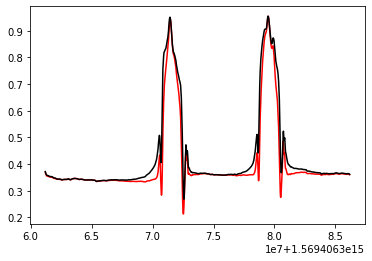

y


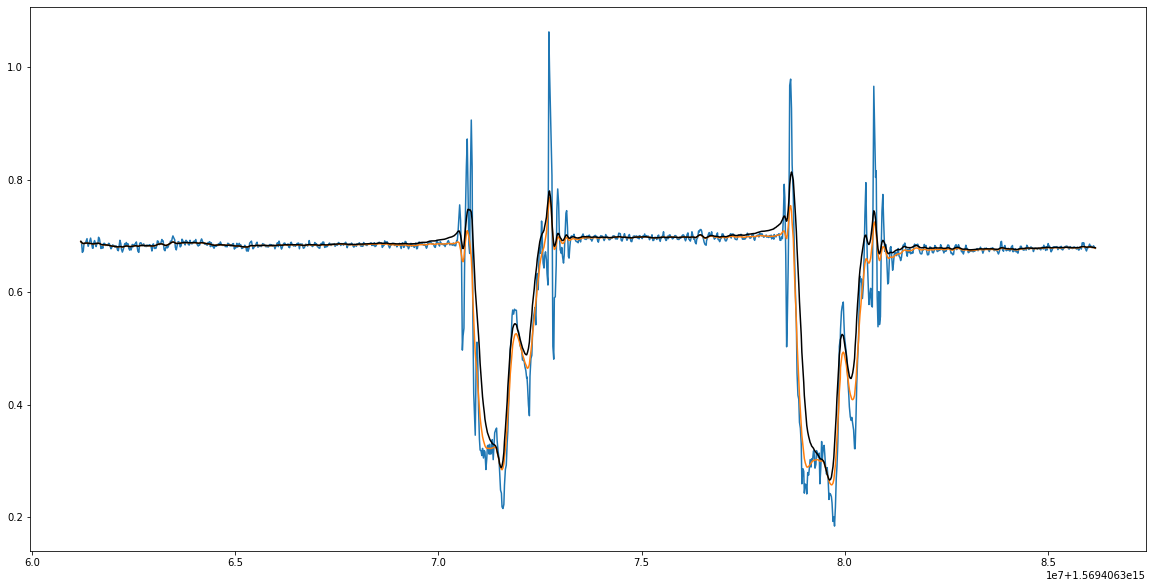

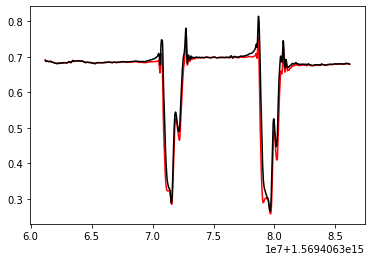

z


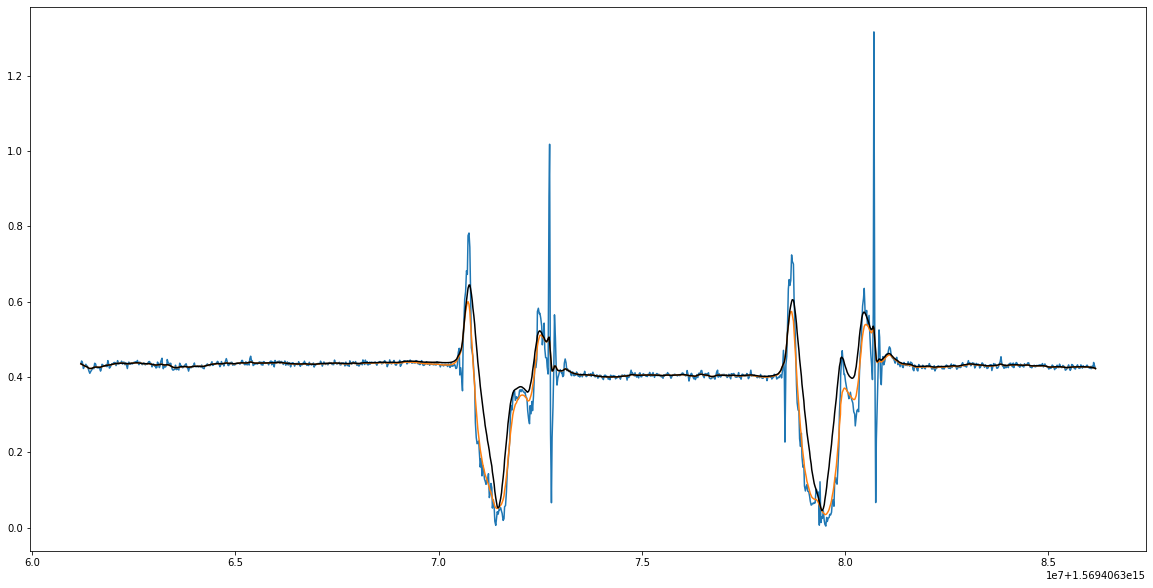

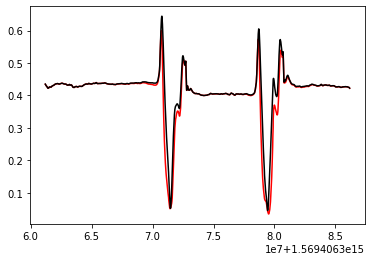

In [12]:
clean('/home/amaya/emp/DATASET/NO-1569406366/accelerometer-1569406366.csv','accelerometer-1569406366.csv','NO-1569406366',0.08);